In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy as sc

dg = pd.read_csv(r"District-Level_GWQ_AllYears.csv")
dg.head()


,country,state,district,year,dyid,arsenic,carbonate,calcium,chloride,electricalconductivity,...,percentageofsodium,phosphateion,residualsodiumcarbonate,sodiumabsorptionratio,sulfate,silicondioxide,hardnesstotal,alkalinitytotal,totaldissolvedsolids,potentialofhydrogen
0,India,West Bengal,24 Paraganas North,2000,24 Paraganas North2000,NaN,NaN,50.588234,78.411766,848.47058,...,NaN,NaN,NaN,2.137251,65.000000,NaN,261.76471,NaN,NaN,7.688235
1,India,West Bengal,24 Paraganas North,2001,24 Paraganas North2001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,West Bengal,24 Paraganas North,2002,24 Paraganas North2002,NaN,NaN,85.666664,98.555557,907.38892,...,NaN,NaN,NaN,1.253333,10.469444,NaN,342.50000,NaN,NaN,7.903333
3,India,West Bengal,24 Paraganas North,2003,24 Paraganas North2003,NaN,NaN,NaN,NaN,874.84210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,West Bengal,24 Paraganas North,2004,24 Paraganas North2004,NaN,NaN,57.040001,71.666664,963.91998,...,NaN,NaN,NaN,2.435200,12.466666,NaN,280.56000,NaN,NaN,7.668000


In [211]:
dg.columns


    




Index(['country', 'state', 'district', 'year', 'dyid', 'arsenic', 'carbonate',
       'calcium', 'chloride', 'electricalconductivity', 'fluorine', 'iron',
       'hydrogencarbonate', 'potassium', 'magnesium', 'nitrate', 'sodium',
       'percentageofsodium', 'phosphateion', 'residualsodiumcarbonate',
       'sodiumabsorptionratio', 'sulfate', 'silicondioxide', 'hardnesstotal',
       'alkalinitytotal', 'totaldissolvedsolids', 'potentialofhydrogen'],
      dtype='object')

In [342]:
sdp99 = pd.read_csv("sdp1999.csv")
sdp04 = pd.read_csv("sdp2004.csv")
sdp11 = pd.read_csv("sdp2011.csv")

for i in (sdp99,sdp04,sdp11):
    for j in range(len(i['YEAR'])):
        x = int(i['YEAR'][j].strip().split()[0][:4])
        i['YEAR'][j] = x

sdp99['YEAR'][len(sdp99['YEAR'])-1]


2004

In [343]:
for i in (sdp99,sdp04,sdp11):
    i.drop('Unnamed: 0',axis = 1,inplace = True)
    for j in range(1,len(i.columns)):
        ss = i.columns[j].lower()
        l = ss.split()
        if "&" in l:
            l.remove("&")
        s = "".join(l)
        print("s :",s)
        i.rename(columns = {i.columns[j]:s},inplace=True)



    

s : andhrapradesh
s : arunachalpradesh
s : assam
s : bihar
s : goa
s : gujarat
s : haryana
s : himachalpradesh
s : jammukashmir
s : jharkhand
s : karnataka
s : kerala
s : madhyapradesh
s : chhattisgarh
s : maharashtra
s : manipur
s : meghalaya
s : mizoram
s : nagaland
s : orissa
s : punjab
s : rajasthan
s : sikkim
s : tamilnadu
s : tripura
s : uttarpradesh
s : uttarakhand
s : westbengal
s : andamannicobarislands
s : chandigarh
s : delhi
s : puducherry
s : telangana
s : andhrapradesh
s : arunachalpradesh
s : assam
s : bihar
s : goa
s : gujarat
s : haryana
s : himachalpradesh
s : jammukashmir
s : jharkhand
s : karnataka
s : kerala
s : madhyapradesh
s : chhattisgarh
s : maharashtra
s : manipur
s : meghalaya
s : mizoram
s : nagaland
s : orissa
s : punjab
s : rajasthan
s : sikkim
s : tamilnadu
s : tripura
s : uttarpradesh
s : uttarakhand
s : westbengal
s : andamannicobarislands
s : chandigarh
s : delhi
s : puducherry
s : telangana
s : andhrapradesh
s : arunachalpradesh
s : assam
s : bihar
s

In [344]:
for i in (sdp99,sdp04,sdp11):
    print(i.columns)

Index(['YEAR', 'andhrapradesh', 'arunachalpradesh', 'assam', 'bihar', 'goa',
       'gujarat', 'haryana', 'himachalpradesh', 'jammukashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhyapradesh', 'chhattisgarh', 'maharashtra',
       'manipur', 'meghalaya', 'mizoram', 'nagaland', 'orissa', 'punjab',
       'rajasthan', 'sikkim', 'tamilnadu', 'tripura', 'uttarpradesh',
       'uttarakhand', 'westbengal', 'andamannicobarislands', 'chandigarh',
       'delhi', 'puducherry', 'telangana'],
      dtype='object')
Index(['YEAR', 'andhrapradesh', 'arunachalpradesh', 'assam', 'bihar', 'goa',
       'gujarat', 'haryana', 'himachalpradesh', 'jammukashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhyapradesh', 'chhattisgarh', 'maharashtra',
       'manipur', 'meghalaya', 'mizoram', 'nagaland', 'orissa', 'punjab',
       'rajasthan', 'sikkim', 'tamilnadu', 'tripura', 'uttarpradesh',
       'uttarakhand', 'westbengal', 'andamannicobarislands', 'chandigarh',
       'delhi', 'puducherry', 't

In [298]:
w = sdp04.iloc[0,1:].astype('float')
x = sdp99.iloc[sdp99.shape[0]-1,1:].astype('float')
r49 = w.div(x)
r49

a = (sdp11.iloc[0,1:]).astype('float')
b = (sdp04.iloc[7,1:]).astype('float')
r114 = a.div(b)

print(sdp99['andhrapradesh'].iloc[5]*r49[1])





121388.00000000001


In [345]:
sdp04.columns
sdp99.head(6)
l =list(r49.index)
l.insert(0,'YEAR')
print(l)
l.remove('unnamed:34')


['YEAR', 'andamannicobarislands', 'andhrapradesh', 'arunachalpradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'delhi', 'goa', 'gujarat', 'haryana', 'himachalpradesh', 'jammukashmir', 'jharkhand', 'karnataka', 'kerala', 'madhyapradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'orissa', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamilnadu', 'telangana', 'tripura', 'unnamed:34', 'uttarakhand', 'uttarpradesh', 'westbengal']


In [346]:
for i in range(sdp99.shape[0]):
    for j in range(1,sdp99.shape[1]):
        print("state: ",sdp99.columns[j])
        print("factor: ",r49[sdp99.columns[j]])
        print("initial: ",sdp99.iloc[i,j])
        sdp99.iloc[i,j] = sdp99.iloc[i,j]*r49[sdp99.columns[j]]
        
        

state:  andhrapradesh
factor:  0.7648222589059567
initial:  116360
state:  arunachalpradesh
factor:  1.4347434743474348
initial:  1497
state:  assam
factor:  1.203382049123881
initial:  32011
state:  bihar
factor:  1.168573569822633
initial:  46071
state:  goa
factor:  1.596139892613554
initial:  5570
state:  gujarat
factor:  1.3715475441683453
initial:  92541
state:  haryana
factor:  1.237257490529216
initial:  47329
state:  himachalpradesh
factor:  1.2408643710470837
initial:  12467
state:  jammukashmir
factor:  1.4100127126339366
initial:  13533
state:  jharkhand
factor:  1.438377704278046
initial:  30229
state:  karnataka
factor:  1.3548531086312914
initial:  90532
state:  kerala
factor:  1.2686281632158858
initial:  61359
state:  madhyapradesh
factor:  1.2833551634691938
initial:  72655
state:  chhattisgarh
factor:  1.3190234885425631
initial:  23840
state:  maharashtra
factor:  1.3560910356959612
initial:  217198
state:  manipur
factor:  1.3002824858757063
initial:  2954
state:  

In [347]:
sdp99.head(6)

,YEAR,andhrapradesh,arunachalpradesh,assam,bihar,goa,gujarat,haryana,himachalpradesh,jammukashmir,...,tamilnadu,tripura,uttarpradesh,uttarakhand,westbengal,andamannicobarislands,chandigarh,delhi,puducherry,telangana
0,1999,88994.718046,2147.810981,38521.462775,53837.352935,8890.499202,126924.381285,58558.159769,15469.856114,19081.702040,...,156628.519264,5532.809158,194854.918573,14167.614978,146533.922931,1257.770221,4511.039550,69764.137005,4160.134,NaN
1,2000,96394.373401,2305.632763,39496.202234,62700.983462,8438.791612,118544.225790,63211.485191,16456.343289,19623.146922,...,165323.270572,5879.840337,198838.777082,15934.292630,151670.252746,1257.770221,5084.436455,72493.356395,4752.590,NaN
2,2001,100765.332611,2674.361836,40515.466830,59105.282588,8766.000290,128177.975740,68093.703249,17295.167604,20001.030329,...,162120.147742,6685.887935,202456.060962,16690.354679,162623.546246,1286.287684,5530.544005,75281.195383,5074.702,NaN
3,2002,103059.034565,2546.669667,42970.366210,66579.479141,9299.111014,139353.345130,72268.210022,18137.714512,21019.059507,...,162931.396171,7132.598283,209007.184499,18253.136201,168323.562530,1422.871324,6227.661404,81050.454353,5578.002,NaN
4,2003,113155.453205,2823.575158,45614.196572,62286.139845,9935.970832,162562.672673,79377.491562,19352.520731,22099.129245,...,173085.086186,7551.004669,220011.879120,19696.872777,178213.804161,1572.963235,6904.555260,85467.372846,5828.214,NaN
5,2004,121388.000000,3188.000000,47181.000000,70167.000000,10999.000000,172265.000000,86222.000000,21189.000000,23292.000000,...,193645.000000,8170.000000,231029.000000,22288.000000,190029.000000,1633.000000,7610.000000,94717.000000,5033.000,NaN


In [348]:
for i in range(sdp04.shape[0]):
    for j in range(1,sdp04.shape[1]):
        print("state: ",sdp04.columns[j])
        print("factor: ",r114[sdp04.columns[j]])
        print("initial: ",sdp04.iloc[i,j])
        sdp04.iloc[i,j] = sdp04.iloc[i,j]*r114[sdp04.columns[j]]

sdp04.head(10)
        
        

state:  andhrapradesh
factor:  1.7749355273186673
initial:  121388
state:  arunachalpradesh
factor:  2.0527794501304437
initial:  3188
state:  assam
factor:  1.9323294792506946
initial:  47181
state:  bihar
factor:  1.7641695169123153
initial:  70167
state:  goa
factor:  1.6327591391382792
initial:  10999
state:  gujarat
factor:  1.5815706203285385
initial:  172265
state:  haryana
factor:  1.7104899604473798
initial:  86222
state:  himachalpradesh
factor:  1.7828302164629657
initial:  21189
state:  jammukashmir
factor:  1.92171226831421
initial:  23292
state:  jharkhand
factor:  1.713923924298564
initial:  53056
state:  karnataka
factor:  2.237348814707305
initial:  148729
state:  kerala
factor:  1.8541163835740326
initial:  104776
state:  madhyapradesh
factor:  1.6649233490566038
initial:  99940
state:  chhattisgarh
factor:  2.0540388363531363
initial:  41387
state:  maharashtra
factor:  1.618894272773256
initial:  370023
state:  manipur
factor:  1.7936681222707425
initial:  4603
stat

,YEAR,andhrapradesh,arunachalpradesh,assam,bihar,goa,gujarat,haryana,himachalpradesh,jammukashmir,...,tamilnadu,tripura,uttarpradesh,uttarakhand,westbengal,andamannicobarislands,chandigarh,delhi,puducherry,telangana
0,2004,215455.873790,6544.260887,91169.237161,123786.482493,17958.717771,272449.262911,147481.865370,37776.389457,44760.522154,...,337921.316790,9868.471673,407921.179139,43081.907940,310686.699968,1620.149228,10773.250272,164909.109295,7499.536072,161790.066898
1,2005,227457.987826,6735.169376,93915.077351,120702.714178,19455.957902,311996.436272,160804.871672,41021.140451,46834.049691,...,386683.409047,10518.317176,431731.251038,49190.075074,330248.800305,1706.464588,11951.087884,181895.006972,9499.213682,187774.544458
2,2006,251348.620024,7098.511339,98156.540557,141592.245427,21364.653336,338383.360502,179088.298859,44248.063142,49568.646249,...,447233.352759,11424.235629,466022.345316,55116.543566,356170.831301,2013.032935,13717.844301,204478.450880,9855.341065,208477.097440
3,2007,282693.981436,7950.414810,102351.627857,148922.369770,22295.326045,378395.515625,193107.474575,46998.970166,52629.933892,...,475248.477444,12177.959781,495890.434025,64750.437552,383881.490609,2220.388225,14730.048499,227528.502064,10634.649106,229691.849317
4,2008,289919.743968,8603.198675,108448.127364,171625.467283,24047.276601,394570.238360,207975.053311,49293.472655,55925.670432,...,500384.260176,13463.156092,533571.616405,71643.388185,399354.596969,2558.704751,15837.102601,255869.670820,11610.646747,260994.692482
5,2009,309550.530900,9317.565924,118440.203101,179835.912215,26318.444564,450323.765867,233960.816790,51967.717980,58635.284731,...,552763.852960,14841.360031,566760.932051,83904.180632,430366.207434,2888.092101,16658.191320,276907.042861,13704.198938,261701.243527
6,2010,330210.780438,9719.910696,124268.108811,207295.210746,31500.822071,499605.506397,249822.190193,56319.606538,61986.750927,...,628152.005542,15962.283129,612018.608203,92718.497763,456461.542452,3139.101137,16655.359980,299873.522593,14620.593670,307973.251248
7,2011,339996.000000,10229.000000,129354.000000,228497.000000,38009.000000,532809.000000,271152.000000,60536.000000,65319.000000,...,674478.000000,17419.000000,645132.000000,101960.000000,473205.000000,3404.000000,16930.000000,314650.000000,15160.000000,325139.000000


In [349]:
ds = pd.concat([sdp99,sdp04,sdp11],axis=0)
ds.head()

,YEAR,andhrapradesh,arunachalpradesh,assam,bihar,goa,gujarat,haryana,himachalpradesh,jammukashmir,...,tamilnadu,tripura,uttarpradesh,uttarakhand,westbengal,andamannicobarislands,chandigarh,delhi,puducherry,telangana
0,1999,88994.718046,2147.810981,38521.462775,53837.352935,8890.499202,126924.381285,58558.159769,15469.856114,19081.702040,...,156628.519264,5532.809158,194854.918573,14167.614978,146533.922931,1257.770221,4511.03955,69764.137005,4160.134,NaN
1,2000,96394.373401,2305.632763,39496.202234,62700.983462,8438.791612,118544.22579,63211.485191,16456.343289,19623.146922,...,165323.270572,5879.840337,198838.777082,15934.292630,151670.252746,1257.770221,5084.436455,72493.356395,4752.590,NaN
2,2001,100765.332611,2674.361836,40515.46683,59105.282588,8766.00029,128177.97574,68093.703249,17295.167604,20001.030329,...,162120.147742,6685.887935,202456.060962,16690.354679,162623.546246,1286.287684,5530.544005,75281.195383,5074.702,NaN
3,2002,103059.034565,2546.669667,42970.36621,66579.479141,9299.111014,139353.34513,72268.210022,18137.714512,21019.059507,...,162931.396171,7132.598283,209007.184499,18253.136201,168323.56253,1422.871324,6227.661404,81050.454353,5578.002,NaN
4,2003,113155.453205,2823.575158,45614.196572,62286.139845,9935.970832,162562.672673,79377.491562,19352.520731,22099.129245,...,173085.086186,7551.004669,220011.879120,19696.872777,178213.804161,1572.963235,6904.55526,85467.372846,5828.214,NaN


In [351]:
ds.reset_index(inplace = True)
ds.to_csv("dstest.csv")


In [360]:
ds.drop('index',axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [ ]:
ds = ds.drop_duplicates(subset = 'YEAR',keep='last')
ds.to_csv("dstest.csv")



In [ ]:
ds.reset_index(inplace = True)
ds.drop('index',axis=1,inplace=True)
ds.head()

,YEAR,andhrapradesh,arunachalpradesh,assam,bihar,goa,gujarat,haryana,himachalpradesh,jammukashmir,...,tamilnadu,tripura,uttarpradesh,uttarakhand,westbengal,andamannicobarislands,chandigarh,delhi,puducherry,telangana
0,1999,88994.718046,2147.810981,38521.462775,53837.352935,8890.499202,126924.381285,58558.159769,15469.856114,19081.702040,...,156628.519264,5532.809158,194854.918573,14167.614978,146533.922931,1257.770221,4511.03955,69764.137005,4160.134,NaN
1,2000,96394.373401,2305.632763,39496.202234,62700.983462,8438.791612,118544.22579,63211.485191,16456.343289,19623.146922,...,165323.270572,5879.840337,198838.777082,15934.292630,151670.252746,1257.770221,5084.436455,72493.356395,4752.590,NaN
2,2001,100765.332611,2674.361836,40515.46683,59105.282588,8766.00029,128177.97574,68093.703249,17295.167604,20001.030329,...,162120.147742,6685.887935,202456.060962,16690.354679,162623.546246,1286.287684,5530.544005,75281.195383,5074.702,NaN
3,2002,103059.034565,2546.669667,42970.36621,66579.479141,9299.111014,139353.34513,72268.210022,18137.714512,21019.059507,...,162931.396171,7132.598283,209007.184499,18253.136201,168323.56253,1422.871324,6227.661404,81050.454353,5578.002,NaN
4,2003,113155.453205,2823.575158,45614.196572,62286.139845,9935.970832,162562.672673,79377.491562,19352.520731,22099.129245,...,173085.086186,7551.004669,220011.879120,19696.872777,178213.804161,1572.963235,6904.55526,85467.372846,5828.214,NaN


In [ ]:
ds.to_csv("dstest.csv")

In [361]:
ds = pd.read_csv("dstest.csv")

In [359]:
#ds.drop(index = [i for i in range(6)],axis=0,inplace=True)

ds.head()


,YEAR,andhrapradesh,arunachalpradesh,assam,bihar,goa,gujarat,haryana,himachalpradesh,jammukashmir,...,tamilnadu,tripura,uttarpradesh,uttarakhand,westbengal,andamannicobarislands,chandigarh,delhi,puducherry,telangana
0,1999,88994.718046,2147.810981,38521.462775,53837.352935,8890.499202,126924.381285,58558.159769,15469.856114,19081.702040,...,156628.519264,5532.809158,194854.918573,14167.614978,146533.922931,1257.770221,4511.03955,69764.137005,4160.134,NaN
1,2000,96394.373401,2305.632763,39496.202234,62700.983462,8438.791612,118544.22579,63211.485191,16456.343289,19623.146922,...,165323.270572,5879.840337,198838.777082,15934.292630,151670.252746,1257.770221,5084.436455,72493.356395,4752.590,NaN
2,2001,100765.332611,2674.361836,40515.46683,59105.282588,8766.00029,128177.97574,68093.703249,17295.167604,20001.030329,...,162120.147742,6685.887935,202456.060962,16690.354679,162623.546246,1286.287684,5530.544005,75281.195383,5074.702,NaN
3,2002,103059.034565,2546.669667,42970.36621,66579.479141,9299.111014,139353.34513,72268.210022,18137.714512,21019.059507,...,162931.396171,7132.598283,209007.184499,18253.136201,168323.56253,1422.871324,6227.661404,81050.454353,5578.002,NaN
4,2003,113155.453205,2823.575158,45614.196572,62286.139845,9935.970832,162562.672673,79377.491562,19352.520731,22099.129245,...,173085.086186,7551.004669,220011.879120,19696.872777,178213.804161,1572.963235,6904.55526,85467.372846,5828.214,NaN


In [362]:
ds.head()

,Unnamed: 0,YEAR,andhrapradesh,arunachalpradesh,assam,bihar,goa,gujarat,haryana,himachalpradesh,...,tamilnadu,tripura,uttarpradesh,uttarakhand,westbengal,andamannicobarislands,chandigarh,delhi,puducherry,telangana
0,0,1999,88994.718046,2147.81098109811,38521.46277450455,53837.352935,8890.499201857496,126924.38128488285,58558.159769,15469.856114,...,156628.519264,5532.809158,194854.918573,14167.614978,146533.9229311162,1257.7702205882354,4511.039549788963,69764.137005,4160.134,NaN
1,1,2000,96394.373401,2305.6327632763278,39496.2022342949,62700.983462,8438.79161224786,118544.22579001426,63211.485191,16456.343289,...,165323.270572,5879.840337,198838.777082,15934.292630,151670.25274630595,1257.7702205882354,5084.436454588088,72493.356395,4752.590,NaN
2,2,2001,100765.332611,2674.3618361836184,40515.46682990282,59105.282588,8766.000290233638,128177.97574025272,68093.703249,17295.167604,...,162120.147742,6685.887935,202456.060962,16690.354679,162623.54624563822,1286.2876838235295,5530.544005002344,75281.195383,5074.702,NaN
3,3,2002,103059.034565,2546.6696669666967,42970.36621011554,66579.479141,9299.111014366565,139353.34513013638,72268.210022,18137.714512,...,162931.396171,7132.598283,209007.184499,18253.136201,168323.56252961702,1422.8713235294117,6227.661403783023,81050.454353,5578.002,NaN
4,4,2003,113155.453205,2823.5751575157515,45614.1965720407,62286.139845,9935.970831519373,162562.67267255313,79377.491562,19352.520731,...,173085.086186,7551.004669,220011.879120,19696.872777,178213.80416146124,1572.9632352941178,6904.5552602782545,85467.372846,5828.214,NaN


In [216]:
dg.columns

Index(['country', 'state', 'district', 'year', 'dyid', 'arsenic', 'carbonate',
       'calcium', 'chloride', 'electricalconductivity', 'fluorine', 'iron',
       'hydrogencarbonate', 'potassium', 'magnesium', 'nitrate', 'sodium',
       'percentageofsodium', 'phosphateion', 'residualsodiumcarbonate',
       'sodiumabsorptionratio', 'sulfate', 'silicondioxide', 'hardnesstotal',
       'alkalinitytotal', 'totaldissolvedsolids', 'potentialofhydrogen'],
      dtype='object')

In [217]:
dg['year'].value_counts()
ds.head()

dg = dg[['year','state','district','chloride']]
dg['state'].value_counts()

for i in range(len(dg['state'])):
    ss = dg['state'][i].lower()
    l = ss.split()
    if "And" in l:
        l.remove("And")
    s = "".join(l)
    dg['state'][i] = s




In [218]:
dg.head()

,year,state,district,chloride
0,2000,westbengal,24 Paraganas North,78.411766
1,2001,westbengal,24 Paraganas North,NaN
2,2002,westbengal,24 Paraganas North,98.555557
3,2003,westbengal,24 Paraganas North,NaN
4,2004,westbengal,24 Paraganas North,71.666664


In [220]:
ds.head()

,YEAR,andhrapradesh,arunachalpradesh,assam,bihar,goa,gujarat,haryana,himachalpradesh,jammuandkashmir,...,tamilnadu,tripura,uttarpradesh,uttarakhand,WEST BENGAL,ANDAMAN AND NICOBAR ISLANDS,CHANDIGARH,DELHI,PONDICHERRY,TELANGANA
0,1999,157959.028216,4408.6501819,74435.9503949,94977.937603,14515.7588342,200739.9423666,100163.654554,27580.983264,36669.946773,...,273325.587404,6682.727972,344049.920599,27384.905694,239574.6553299,1247.3883961,6386.5236375,121464.212838,6198.741392,
1,2000,171092.868006,4732.5990931,76319.4629319,110614.838402,13778.2436187,187486.1300255,108123.161511,29339.777015,37710.459561,...,288498.418123,7101.884842,351084.108977,30799.757168,247972.2633412,1247.3883961,7198.3127707,126215.973544,7081.521016,
2,2001,178850.996626,5489.4615492,78289.0124612,104271.431183,14312.4860893,202722.5912177,116474.189018,30835.304784,38436.650777,...,282908.788386,8075.458423,357471.046710,32261.166724,265880.2771468,1275.6704719,7829.8914532,131069.795043,7561.478871,
3,2002,182922.147585,5227.3574301,83032.6736654,117457.142127,15182.9104071,220397.2332726,123614.677312,32337.469509,40393.031592,...,284324.462584,8615.011416,369038.183681,35281.902724,275199.4805728,1411.1267297,8816.8384078,141114.476015,8311.413017,
4,2003,200842.542321,5795.7405197,88141.4107563,109882.986091,16222.7286791,257104.4366173,135775.093950,34503.329990,42468.637831,...,302043.223513,9120.377855,388468.867487,38072.534036,291369.4648514,1559.9797602,9775.1537954,148804.638196,8684.237422,


In [364]:
#for i in range(len(ds['YEAR'])):
 #   ds['YEAR'][i] = int(ds['YEAR'][i][:4])
#print(ds['YEAR'])
ds.columns
ds.drop('Unnamed: 0',axis=1,inplace = True)

In [365]:
ds.head()
dg.head()


,year,state,district,chloride,sdp
0,2000,westbengal,24paraganasnorth,78.411766,247972.2633412
1,2001,westbengal,24paraganasnorth,NaN,265880.2771468
2,2002,westbengal,24paraganasnorth,98.555557,275199.4805728
3,2003,westbengal,24paraganasnorth,NaN,291369.4648514
4,2004,westbengal,24paraganasnorth,71.666664,310686.6401106


In [367]:
dg.head()
dg2 = dg

dg2['sdp'] = [i for i in range(len(dg['state']))] 

#print(dg['state'].value_counts())

ds.rename(columns = {'jammukashmir':'jammuandkashmir','orissa':'odisha','andamannicobarislands':'andamanandnicobarislands','puducherry':'pondicherry'},inplace = True)
print(ds.columns)



for i in range(len(dg['year'])):
    #dg2['sdp'][i] = ds[ds['YEAR'] == dg['year'][i]][dg['state'][i]]
    #print(ds[ds['YEAR'] == dg['year'][i]][dg['state'][i]])
    if(dg['state'][i]!='thedadraandnagarhavelianddamananddiu'):
        dg2['sdp'][i] = ds[ds['YEAR'] == dg['year'][i]][dg['state'][i]].values[0]
    

Index(['YEAR', 'andhrapradesh', 'arunachalpradesh', 'assam', 'bihar', 'goa',
       'gujarat', 'haryana', 'himachalpradesh', 'jammuandkashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhyapradesh', 'chhattisgarh', 'maharashtra',
       'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'punjab',
       'rajasthan', 'sikkim', 'tamilnadu', 'tripura', 'uttarpradesh',
       'uttarakhand', 'westbengal', 'andamanandnicobarislands', 'chandigarh',
       'delhi', 'pondicherry', 'telangana'],
      dtype='object')


In [368]:
dg2.head()
dg2.columns

Index(['year', 'state', 'district', 'chloride', 'sdp'], dtype='object')

In [369]:
dg2['chloride'].isnull().sum()/len(dg2['chloride'])*100

33.31055688418176

In [370]:
gin = pd.read_csv(r"gini.txt")

In [371]:
gin.head()
gin.rename(columns = {'DistrictName':'district'},inplace = True)

In [372]:
for i in range(len(dg2['district'])):
    dg2['district'][i] = "".join(dg2['district'][i].strip().lower().split())

dg2.head()
import warnings

# Suppress all warnings (not recommended for production)
warnings.filterwarnings("ignore")

In [373]:
for i in range(len(gin['district'])):
    gin['district'][i] = "".join(gin['district'][i].strip().lower().split())


In [374]:
gin.head()

,district,ginivalue
0,southandaman,0.33
1,nicobar,0.33
2,northandmiddleandaman,0.30
3,andamanandnicobarislands,0.33
4,westgodavari,0.26


In [375]:
fin = dg2.merge(gin,on = 'district')

In [376]:
fin.head()

,year,state,district,chloride,sdp,ginivalue
0,2000,westbengal,24paraganasnorth,78.411766,151670.25274630595,NaN
1,2001,westbengal,24paraganasnorth,NaN,162623.54624563822,NaN
2,2002,westbengal,24paraganasnorth,98.555557,168323.56252961702,NaN
3,2003,westbengal,24paraganasnorth,NaN,178213.80416146124,NaN
4,2004,westbengal,24paraganasnorth,71.666664,310686.6999675226,NaN


In [377]:
fin.to_csv("final.csv")

In [378]:
fin = pd.read_csv("final.csv")


In [379]:
fin[fin['year']==2000][['district','chloride','sdp','ginivalue']]



,district,chloride,sdp,ginivalue
0,24paraganasnorth,78.411766,151670.252746,NaN
19,24paraganassouth,189.645160,151670.252746,0.29
38,adilabad,76.699997,NaN,0.37
57,agra,799.500000,198838.777082,0.26
58,agra,799.500000,198838.777082,0.26
...,...,...,...,...
11632,yadadribhuvanagiri,489.000000,NaN,NaN
11651,yadgir,NaN,123475.892908,NaN
11670,yamunanagar,26.100000,63211.485191,0.26
11689,yanam,78.000000,4752.590000,0.32


In [381]:
d = {}
fin['intercept'] = [1 for i in fin['year']]

for i in range(len(fin['district'].unique())):
    p = fin[fin['district']==fin['district'][i]][['intercept','year','chloride','sdp','ginivalue']]
    d[fin['district'].unique()[i]] = p
    
'''for i in range(len(fin['year'])):
    if(len(fin['sdp'][i].strip())==0):
        fin['sdp'][i] = 0
    else:
        fin['sdp'][i] = float(fin['sdp'][i])'''
    

fin.head()






,Unnamed: 0,year,state,district,chloride,sdp,ginivalue,intercept
0,0,2000,westbengal,24paraganasnorth,78.411766,151670.252746,NaN,1
1,1,2001,westbengal,24paraganasnorth,NaN,162623.546246,NaN,1
2,2,2002,westbengal,24paraganasnorth,98.555557,168323.562530,NaN,1
3,3,2003,westbengal,24paraganasnorth,NaN,178213.804161,NaN,1
4,4,2004,westbengal,24paraganasnorth,71.666664,310686.699968,NaN,1


In [382]:
fin

,Unnamed: 0,year,state,district,chloride,sdp,ginivalue,intercept
0,0,2000,westbengal,24paraganasnorth,78.411766,1.516703e+05,NaN,1
1,1,2001,westbengal,24paraganasnorth,NaN,1.626235e+05,NaN,1
2,2,2002,westbengal,24paraganasnorth,98.555557,1.683236e+05,NaN,1
3,3,2003,westbengal,24paraganasnorth,NaN,1.782138e+05,NaN,1
4,4,2004,westbengal,24paraganasnorth,71.666664,3.106867e+05,NaN,1
...,...,...,...,...,...,...,...,...
11722,11722,2014,maharashtra,yavatmal,93.381577,1.345341e+06,0.25,1
11723,11723,2015,maharashtra,yavatmal,151.619050,1.452513e+06,0.25,1
11724,11724,2016,maharashtra,yavatmal,96.471207,1.596121e+06,0.25,1
11725,11725,2017,maharashtra,yavatmal,84.136261,1.661065e+06,0.25,1


In [383]:
#convert the dataset to float
fin['sdp']
#print length of the dataset
print(len(fin['sdp']))

#print the type of the dataset
print(type(fin['sdp'][0]))

#apply loop to convert str to float
'''for i in range(len(fin['sdp'])):
    if(len(fin['sdp'][i].strip())==0):
        fin['sdp'][i] = 0
    else:
        fin['sdp'][i] = float(fin['sdp'][i])

#print the type of the dataset
print(type(fin['sdp'][0]))'''

fin[fin['district']=='24parganasnorth']
fin.head()

11727
<class 'numpy.float64'>


,Unnamed: 0,year,state,district,chloride,sdp,ginivalue,intercept
0,0,2000,westbengal,24paraganasnorth,78.411766,151670.252746,NaN,1
1,1,2001,westbengal,24paraganasnorth,NaN,162623.546246,NaN,1
2,2,2002,westbengal,24paraganasnorth,98.555557,168323.562530,NaN,1
3,3,2003,westbengal,24paraganasnorth,NaN,178213.804161,NaN,1
4,4,2004,westbengal,24paraganasnorth,71.666664,310686.699968,NaN,1


In [384]:
gin[gin['ginivalue'].isnull()]
#tapi was made from surat
#samba from jammu
#reasi from udhampur
#ignoring palwal mumbai central surajpur
#focus on sambhal etc, warangalurban
# howrah hooghly?
# mahabubnagar: narayanpet, jogulambagadwal, wanaparathy
#sambhal manually
change = {'tapi':'surat','bandipora':'baramulla','samba':'jammu','reasi':'udhampur','ramban':'doda','kishtwar':'doda','kulgam':'anantnag','shopian':'pulwama','ganderbal':'srinagar','simdega':'gumla','saraikelakharsawan':'pashchimisinghbhum',
          'yadgir':'kalaburagi','pratapgarh':'chittorgarh','tiruppur':'coimbatore','jangoan':'warangal','kumurambheemasifabad':'adilabad','mancherial':'adilabad'
          ,'jayashankarbhupalapally':'warangal','peddapalli':'karimnagar','siddipet':'medak','suryapet':'nalgonda','mahabubabad':'warangal',
          'nirmal':'adilabad','srikakulam':'visakhapatanam','medchalmalkajgiri':'andhrapradesh','sangareddy':'medak','bhadradrikothagudem':'khammam',
          'yadadribhuvanagiri':'nalgonda','warangalurban':'warangal','warangalrural':'warangal','sambhal':'moradabad','kamareddy':'nizamabad',
          'rajannasircilla':'karimnagar','howrah':'hooghly','alipurduar':'jalpaiguri','jagitial':'karimnagar','kasganj':'etah',
          'hanumakonda':'warangal','vikarabad':'rangareddy','ayodhya':'faizabad','dholpur':'bharatpur','westnimar':'khargone','24paraganasnorth':'northtwentyfour'
          ,'shamli':'muzaffarnagar','jhargram':'medinipurwest'}


gin[gin['ginivalue'].isnull()]
#tapi was made from surat

,district,ginivalue
152,tapi,NaN
174,palwal,NaN
202,samba,NaN
203,reasi,NaN
204,ramban,NaN
205,kishtwar,NaN
206,kulgam,NaN
207,shopian,NaN
208,ganderbal,NaN
209,bandipora,NaN


In [385]:
for i in change:
    if(i!='sambhal'):
        print("dis: ",i)
        
        gin['ginivalue'][gin['district'].to_list().index(i)] = gin[gin['district']==change[i]]['ginivalue']
        gin[gin['ginivalue'].isnull()]
        print("val: ",gin['ginivalue'][gin['district'].to_list().index(i)])


gin['ginivalue'][gin['district'].to_list().index('sambhal')] = 0.27




dis:  tapi
val:  0.29
dis:  bandipora
val:  0.2
dis:  samba
val:  0.31
dis:  reasi
val:  0.26
dis:  ramban
val:  0.21
dis:  kishtwar
val:  0.21
dis:  kulgam
val:  0.17
dis:  shopian
val:  0.2
dis:  ganderbal
val:  0.28
dis:  simdega
val:  0.21
dis:  saraikelakharsawan
val:  0.19
dis:  yadgir
val:  0.23
dis:  pratapgarh
val:  0.3
dis:  tiruppur
val:  0.34
dis:  jangoan
val:  0.23
dis:  kumurambheemasifabad
val:  0.37
dis:  mancherial
val:  0.37
dis:  jayashankarbhupalapally
val:  0.23
dis:  peddapalli
val:  0.2
dis:  siddipet
val:  0.23
dis:  suryapet
val:  0.32
dis:  mahabubabad
val:  0.23
dis:  nirmal
val:  0.37
dis:  srikakulam
val:  0.42
dis:  medchalmalkajgiri
val:  0.32
dis:  sangareddy
val:  0.23
dis:  bhadradrikothagudem
val:  0.23
dis:  yadadribhuvanagiri
val:  0.32
dis:  warangalurban
val:  0.23
dis:  warangalrural
val:  0.23
dis:  kamareddy
val:  0.27
dis:  rajannasircilla
val:  0.2
dis:  howrah
val:  0.28
dis:  alipurduar
val:  0.22
dis:  jagitial
val:  0.2
dis:  kasganj
val

In [386]:
gin.rename(columns = {'ginivalue':'gini'},inplace = True)


In [387]:
fin = fin.merge(gin, on = 'district')


In [388]:
fin.head()
fin.drop('ginivalue',axis=1,inplace = True)



In [389]:
fin.drop('Unnamed: 0',axis=1,inplace=True)

In [390]:
fin.to_csv("finalfinal.csv")

In [406]:
region_dict = {'delhi':'northern_region','chandigarh':'northern_region','himachalpradesh':'northern_region','jammuandkashmir':'northern_region', 'haryana':'northern_region','punjab':'northern_region','rajasthan':'northern_region','uttarakhand':'northern_region', 'arunachalpradesh':'north_eastern_region','assam':'north_eastern_region','manipur':'north_eastern_region','meghalaya':'north_eastern_region', 'mizoram':'north_eastern_region','nagaland':'north_eastern_region','tripura':'north_eastern_region', 'andamanandnicobarislands':'eastern_region','bihar':'eastern_region','jharkhand':'eastern_region','odisha':'eastern_region', 'sikkim':'eastern_region','westbengal':'eastern_region', 'chhattisgarh':'central_region','madhyapradesh':'central_region','uttarpradesh':'central_region', 'dadraandnagarhaveli':'western_region','thedadraandnagarhavelianddamananddiu':'western_region','goa':'western_region','maharashtra':'western_region', 'gujarat':'western_region', 'andhrapradesh':'southern_region','telangana':'southern_region','kerala':'southern_region','lakshadweep':'southern_region', 'karnataka':'southern_region','pondicherry':'southern_region','tamilnadu':'southern_region'}

In [407]:
region_list = [region_dict[i] for i in fin['state']]

In [408]:
region_list
fin['region'] = region_list

In [409]:
fin.to_csv("finalwithregions.csv")

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     12.29
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:16:19   Log-Likelihood:                -51061.
No. Observations:                7724   AIC:                         1.031e+05
Df Residuals:                    7233   BIC:                         1.065e+05
Df Model:                         490                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                235

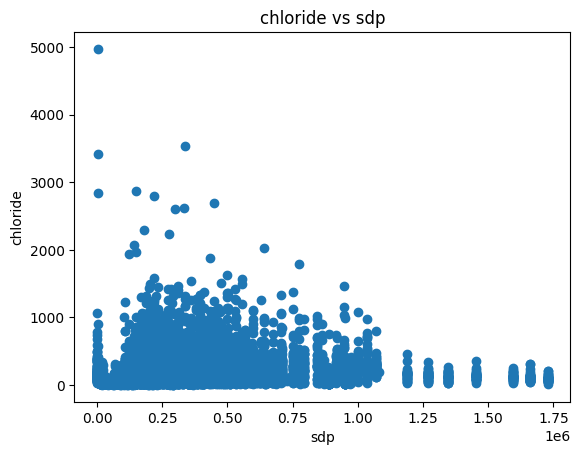

ValueError: x and y must be the same size

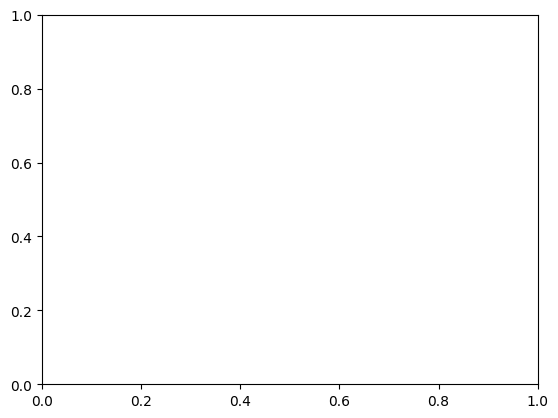

In [ ]:
fin['sdp2'] = fin['sdp']**2
fin['sdp3'] = fin['sdp']**3
#print(fin[['sdp','sdp2','sdp3']])
#print(fin['ginivalue'].value_counts())
fin.isnull().sum()
#print(fin.columns)
fin.drop('Unnamed: 0',axis=1,inplace = True)
fin.to_csv("finall.csv")

fin.shape
import statsmodels.api as sm

# Assuming your data is in a pandas DataFrame named 'fin'

y = fin['chloride']
X = fin['sdp']

# Add a constant column for the intercept
X = sm.add_constant(X)
X = X.astype('float64')


# Create the model object
model = sm.OLS(y, X, hasconst=True).fit()

# Print the model summary
#print(model.summary())
#print(sum(model.resid))

fin.shape
import statsmodels.formula.api as fm

model = fm.ols(formula = 'chloride ~ sdp',data = fin).fit()
print(model.summary())

plt.scatter(fin['sdp'],fin['chloride'])
plt.xlabel('sdp')
plt.ylabel('chloride')
plt.title('chloride vs sdp')
plt.show()


#plot having 𝑢̂𝑖,𝑡 on Y-axis and SDP on x-axis.
plt.scatter(fin['sdp'],model.resid)
plt.xlabel('sdp')
plt.ylabel('residuals')
plt.title('residuals vs sdp')
plt.show()

print("res: ",sum(model.resid))







                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     100.3
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.63e-23
Time:                        17:09:27   Log-Likelihood:                -79746.
No. Observations:               11727   AIC:                         1.595e+05
Df Residuals:                   11725   BIC:                         1.595e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.5034      3.156     33.111      0.0

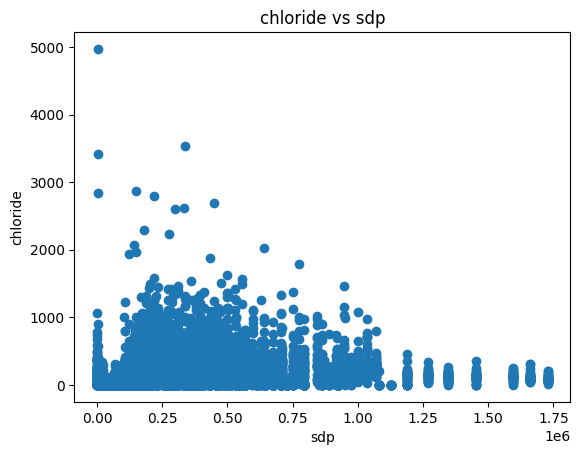

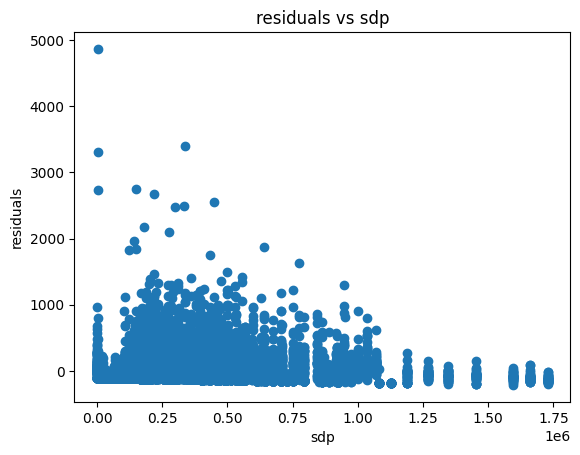

res:  6.42430109110137e-10


In [ ]:
import statsmodels.api as sm

# Assuming your data is in a pandas DataFrame named 'fin'

y = fin['chloride']
X = fin['sdp']

# Add a constant column for the intercept
X = sm.add_constant(X)
X = X.astype('float64')


# Create the model object
model = sm.OLS(y, X, hasconst=True).fit()

# Print the model summary
print(model.summary())
plt.scatter(fin['sdp'],fin['chloride'])
plt.xlabel('sdp')
plt.ylabel('chloride')
plt.title('chloride vs sdp')
plt.show()


#plot having 𝑢̂𝑖,𝑡 on Y-axis and SDP on x-axis.
plt.scatter(fin['sdp'],model.resid)
plt.xlabel('sdp')
plt.ylabel('residuals')
plt.title('residuals vs sdp')
plt.show()

print("res: ",sum(model.resid))


In [ ]:
fin = pd.read_csv("gini_gwq_nsdp.csv")
fin.head()
# fin.dropna(axis = 0, how = 'any',inplace=True)

,country,state,district,year,dyid,chloride,nsdp,gini
0,NaN,Andaman And Nicobar Islands,Nicobar,NaN,NaN,NaN,NaN,0.33
1,India,Andaman And Nicobar Islands,North And Middle Andaman,2000.0,North And Middle Andaman2000,NaN,1247.388396,0.30
2,India,Andaman And Nicobar Islands,North And Middle Andaman,2001.0,North And Middle Andaman2001,NaN,1275.670472,0.30
3,India,Andaman And Nicobar Islands,North And Middle Andaman,2002.0,North And Middle Andaman2002,NaN,1411.126730,0.30
4,India,Andaman And Nicobar Islands,North And Middle Andaman,2003.0,North And Middle Andaman2003,NaN,1559.979760,0.30


In [ ]:
fin.shape
import statsmodels.formula.api as fm
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()


model = fm.ols(formula = 'chloride ~ nsdp + I(nsdp**2) + I(nsdp**3) + gini',data = fin, missing='drop').fit()
print(model.summary())
print("res: ",sum(model.resid))

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.42e-92
Time:                        17:09:28   Log-Likelihood:                -53456.
No. Observations:                7823   AIC:                         1.069e+05
Df Residuals:                    7820   BIC:                         1.069e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.004e-09   1.24e-10     48.388   

In [ ]:
import statsmodels.api as sm

# Assuming your data is in a pandas DataFrame named 'fin'

y = fin['chloride']
X = fin['sdp']

# Add a constant column for the intercept
X = sm.add_constant(X)
X = X.astype('float64')


# Create the model object
model = sm.OLS(y, X, hasconst=True).fit()

# Print the model summary
print(model.summary())
print(sum(model.resid))

KeyError: 'sdp'

In [ ]:
import statsmodels.formula.api as fm

model = fm.ols(formula = 'chloride ~ sdp + I(sdp**2) + I(sdp**3) + ginivalue',data = fin).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                calcium   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     26.30
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:31:12   Log-Likelihood:                -55736.
No. Observations:               11727   AIC:                         1.127e+05
Df Residuals:                   11110   BIC:                         1.173e+05
Df Model:                         616                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

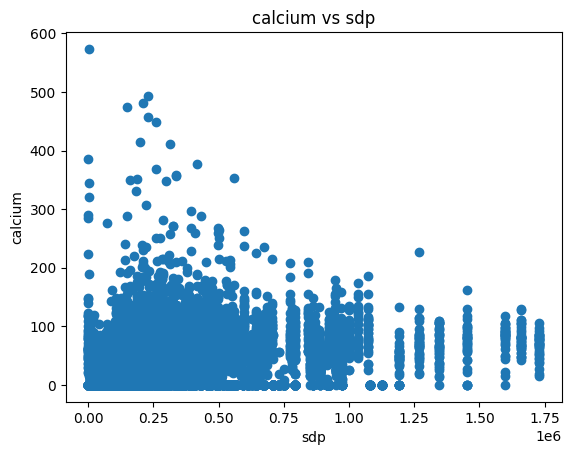

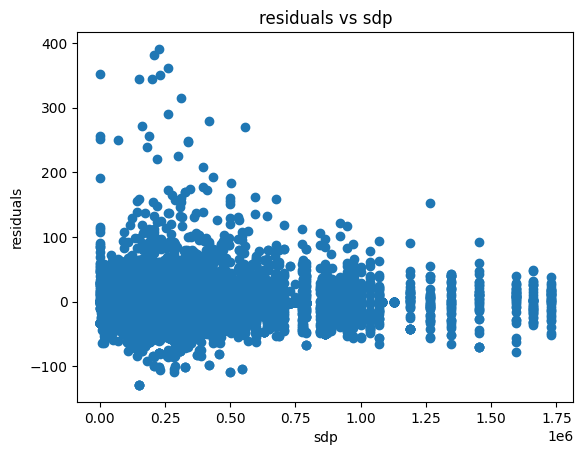

In [ ]:
#Visualize the model residuals (i.e.,𝑢̂𝑖,𝑡) on a plot having the groundwater quality indicator (chlorine) on Y-axis and SDP on the X-axis.
plt.scatter(fin['sdp'],fin['chloride'])
plt.xlabel('sdp')
plt.ylabel('chloride')
plt.title('chloride vs sdp')
plt.show()


#plot having 𝑢̂𝑖,𝑡 on Y-axis and SDP on x-axis.
plt.scatter(fin['sdp'],model.resid)
plt.xlabel('sdp')
plt.ylabel('residuals')
plt.title('residuals vs sdp')
plt.show()



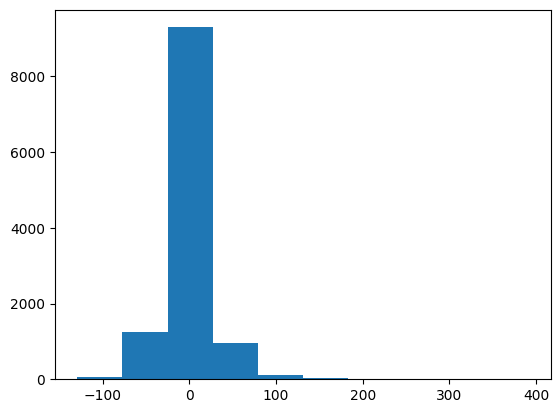

-165.45106405758787


In [ ]:
#Plot a histogram of 𝑢̂𝑖,𝑡 and verify that ∑𝑖,𝑡 𝑢̂𝑖,𝑡 = 0.
plt.hist(model.resid)
plt.show()

s = 0
l = [0]

for i in model.resid:
    s+=i
    l.append(s)

d = pd.DataFrame(l)
d.to_csv("check.csv")

print(s)

    




In [ ]:
import statsmodels.formula.api as fm

